## Introduction

In this notebook, I'll be doing the preprocessing of the images for the Haar cascade classifier. I'll actually run the classifer using the OpenCV command line tools, so the aim of this exercise is to create the correct inputs for the classifer. I have been using the following tutorial as a reference:
https://pythonprogramming.net/haar-cascade-object-detection-python-opencv-tutorial/


In [20]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import os
import pickle
from sklearn.utils import shuffle

In [36]:
os.chdir("/Users/johnreid/capstone/cascade")
os.getcwd()
#!mkdir data pos neg

Cascade preprocessing.ipynb pos
bg.txt                      positives.vec
data                        watch5050.jpg
neg


### Creating the negative images

I'll follow the instructions in the tutorial

#### Creating the positive images

I'll use a random sample of images from the GTSRB dataset (the same as the one I used to train the classifier)

In [37]:
# Get the images
training_file = "/Users/johnreid/capstone/jupyter_notebooks/data/train.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']

# Shuffle them
X_train = shuffle(X_train)

# Take only a subsample of them
X_train = X_train[:5000]

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# Convert to greyscale
X_train = np.asarray([rgb2gray(x) for x in X_train]).astype(int)

[[18 18 26 ..., 21 18 22]
 [21 20 21 ..., 18 18 19]
 [19 22 20 ..., 15 18 21]
 ..., 
 [23 21 24 ..., 12 21 33]
 [22 23 25 ..., 25 29 38]
 [23 26 28 ..., 25 32 27]]


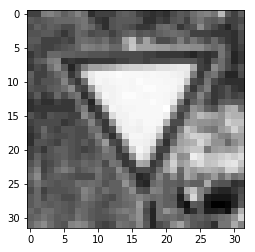

In [38]:
# Let's test one of the images to see if it looks right
print(X_train[55])
plt.imshow(X_train[55], cmap = "Greys_r")
plt.show()

In [39]:
# Save the positive images in the 'pos' directory, and create the lst file
file_path = "/Users/johnreid/capstone/cascade/"

pic_num = 1
for img in X_train:
    try:
        line = str(pic_num) + '.jpg' + ' 1 0 0 32 32\n'
        with open(file_path + 'pos/pos.lst','a') as f:
            f.write(line)
        plt.imsave(file_path + "pos/"+str(pic_num)+".jpg",img, cmap = "Greys_r")
        pic_num += 1

    except Exception as e:
        print(str(e))  

### Training the classifier
mkdir data

opencv_createsamples -info pos/pos.lst -num 5000 -w 32 -h 32 -vec positives.vec

opencv_traincascade -data data -vec positives.vec -bg bg.txt -numPos 1000 -numNeg 900 -numStages 10 -w 20 -h 20